# This notebook reads in the hospital and payer csv files and generates the output
### Amy Furey

### To run this jupyter notebook clone the serif-health repo (https://github.com/amyfurey/serif-health) and update repo_directory below to the path of the serif-health repository

In [1]:
repo_directory = "C:/Users/thoma/Desktop/MOMS STUFF/"

### Install python packages

In [2]:
!pip install plotly


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install pandas




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Set path to the repo

In [5]:
repo_directory

'C:/Users/thoma/Desktop/MOMS STUFF/'

In [6]:
input_directory = repo_directory + "serif-health/data/input_data/"

In [7]:
#import necessary packages and set pandas displays
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
hosp = pd.read_csv(input_directory +"hospital_extract_20250203.csv", dtype={'code': str, 'ein': str})

In [9]:
hosp.head()

,payer,network_name,network_id,network_year_month,network_region,code,code_type,ein,taxonomy_filtered_npi_list,modifier_list,billing_class,place_of_service_list,negotiation_type,arrangement,rate,cms_baseline_schedule,cms_baseline_rate
0,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,872,MS-DRG,131740114,"1003990763,1023202793,1063525152,1063606739,10...",NaN,institutional,NaN,negotiated,ffs,15902.00,IPPS,6829.75
1,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,99283,CPT,131624096,"1003255670,1245759711,1487026522,1598095267,16...",NaN,professional,11,negotiated,ffs,123.86,PFS_NONFACILITY_1320201,76.89
2,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,43239,CPT,131740114,"1700348620,1700892056,1922539964,1942685292",NaN,professional,11,negotiated,ffs,993.92,PFS_NONFACILITY_1320202,424.76
3,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,872,MS-DRG,133971298,"1245635200,1437523537,1528013695,1528432622,15...",NaN,institutional,NaN,negotiated,ffs,27924.63,IPPS,6829.75
4,unitedhealthcare,choice-plus,592bc118-0dac-4f38-949c-11dc9b3a3879,202501,USA,43239,CPT,131740114,1346697315,NaN,professional,11,negotiated,ffs,849.63,PFS_NONFACILITY_1320203,391.85


In [10]:
payer = pd.read_csv(input_directory + "payer_extract_20250203.csv", dtype={'raw_code': str})

In [11]:
payer.head()

,source_file_name,hospital_id,hospital_name,last_updated_on,hospital_state,license_number,payer_name,plan_name,code_type,raw_code,description,setting,modifiers,standard_charge_gross,standard_charge_discounted_cash,standard_charge_negotiated_dollar,standard_charge_negotiated_percentage,standard_charge_min,standard_charge_max,standard_charge_methodology,additional_payer_notes,additional_generic_notes
0,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Aetna,Medicare,CPT,99283,EMERGENCY DEPT VISIT LOW MDM,outpatient,NaN,NaN,NaN,323.34,NaN,83.78,1009.22,fee schedule,NaN,NaN
1,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,HealthFirst,Commercial Enrollees,CPT,43239,EGD BIOPSY SINGLE/MULTIPLE,outpatient,NaN,NaN,NaN,1037.65,NaN,165.40,3206.34,fee schedule,NaN,NaN
2,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Aetna,Commercial,CPT,43239,UPPER GI ENDOSCOPY BIOPSY,outpatient,NaN,NaN,NaN,1246.73,NaN,1246.73,1394.79,fee schedule,NaN,NaN
3,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Cigna,LocalPlus,CPT,99283,HC EMERGENCY DEPT VISIT LVL 3,outpatient,NaN,3744.0,2433.6,1797.00,NaN,225.00,1797.00,other,NaN,per visit
4,13-1740114_montefiore-medical-center_standardc...,62915ae8-8d64-4e2f-b05f-b18edde57a3d,Montefiore Medical Center,2024-07-01,NY,13-1740114,Oscar,Medicare,CPT,43239,EGD BIOPSY SINGLE/MULTIPLE,outpatient,NaN,NaN,NaN,1037.65,NaN,141.77,1815.10,fee schedule,NaN,NaN


### Standardize string columns to lower case

In [12]:
payer["hospital_name"] = payer["hospital_name"].str.lower()
payer["payer_name"] = payer["payer_name"].str.lower()
payer["plan_name"] = payer["plan_name"].str.lower()
payer["code_type"] = payer["code_type"].str.lower()

In [13]:
hosp["payer"] = hosp["payer"].str.lower()
hosp["network_name"] = hosp["network_name"].str.lower()
hosp["code_type"] = hosp["code_type"].str.lower()
hosp["cms_baseline_schedule"] = hosp["cms_baseline_schedule"].str.lower()

#### Extract first 9 digits of source_file_name 

In [14]:
# get all characters in source_file_name before the first underscore
payer["ein"] = payer["source_file_name"].str.split('_').str[0]

In [15]:
# remove any hyphens then extract the first nine characters
payer["ein"] = payer['ein'].str.replace('-', '', regex=False).str[:9] 


In [16]:
# remove any MS-DRG found in the raw_code
payer["code"] = payer["raw_code"].str.replace("MS-DRG ", '', regex=False)

#### Create a new column payer and assign payer names as they are in the hosp df

In [17]:
conditions = [
    payer['payer_name'].str.lower() == 'aetna',
    payer['payer_name'].str.lower() == 'cigna',
    payer['payer_name'].str.lower().isin(['united', 'united healthcare', 'uhc'])
]

results = ['aetna', 'cigna-corporation', 'unitedhealthcare']

# Use np.select to create the 'payer' column based on the conditions
payer['payer'] = np.select(conditions, results, default= payer['payer_name']) 


In [18]:
payer.shape

(2950, 25)

In [19]:
hosp.shape

(222, 17)

In [20]:
# Merge the hosp and payer dataframes
all = payer.merge(hosp, on=["code", "payer", "ein", "code_type"], how="outer")

In [21]:
# Set an indicator to Yes if data is available in both dataframes, otherwise set to No
all["match_indicator"] = np.where((all['network_name'].notnull()) & (all['source_file_name'].notnull()), "Yes", "No")

In [22]:
all['match_indicator'].value_counts()

match_indicator
Yes    2837
No     2655
Name: count, dtype: int64

In [23]:
all.groupby('hospital_name')['match_indicator'].value_counts()

hospital_name              match_indicator
montefiore medical center  Yes                 842
                           No                  336
nyu langone                No                 2088
                           Yes                1861
the mount sinai hospital   No                  226
                           Yes                 134
Name: count, dtype: int64

In [24]:
all['match_indicator'].value_counts(normalize=True) * 100

match_indicator
Yes    51.656956
No     48.343044
Name: proportion, dtype: float64

In [25]:
# If standard_charge_negotiated_dollor is not missing assign the payer rate to the value in standard_charge_negotiated_dollor otherwise use the standard_charge_negotiated_percentage to 
#calculate the rate.
all['payer_rate'] = np.where(all['standard_charge_negotiated_dollar'].notnull(), all['standard_charge_negotiated_dollar'],all['standard_charge_negotiated_percentage'] * all['rate'] / 100)

In [26]:
all["rate_delta"] = all['rate'] - all['payer_rate']

#### Create a reduced dataframe of all df to just specific  for readability

In [27]:
reduced_df = all[['hospital_name', 'payer', 
       'code_type', 'code', 'description', 'standard_charge_negotiated_dollar','standard_charge_negotiated_percentage', 'ein',
       'rate', 'match_indicator', 'payer_rate', 'rate_delta']]

In [28]:
reduced_df.head()


,hospital_name,payer,code_type,code,description,standard_charge_negotiated_dollar,standard_charge_negotiated_percentage,ein,rate,match_indicator,payer_rate,rate_delta
0,the mount sinai hospital,1199,cpt,43239,HC Egd Transoral Biopsy Single/Multiple,174.00,NaN,131624096,NaN,No,174.00,NaN
1,the mount sinai hospital,1199,cpt,43239,Egd biopsy single/multiple,2719.00,NaN,131624096,NaN,No,2719.00,NaN
2,nyu langone,1199,cpt,43239,HC UGI W BX. SGL/MULTIPLE,1248.57,NaN,133971298,NaN,No,1248.57,NaN
3,nyu langone,1199,cpt,43239,HC UGI W BX. SGL/MULTIPLE,5713.00,NaN,133971298,NaN,No,5713.00,NaN
4,nyu langone,1199,cpt,43239,HC UGI W BX. SGL/MULTIPLE,5713.00,NaN,133971298,NaN,No,5713.00,NaN


#### Output both dataframes, all and reduced_df to csv files

In [29]:
output_directory = repo_directory + "serif-health/data/output_data/"

In [30]:
all.to_csv(output_directory + "all_df.csv", index = False)

In [31]:

reduced_df.to_csv(output_directory + "reduced_df.csv", index = False)

# This graph was just for fun.

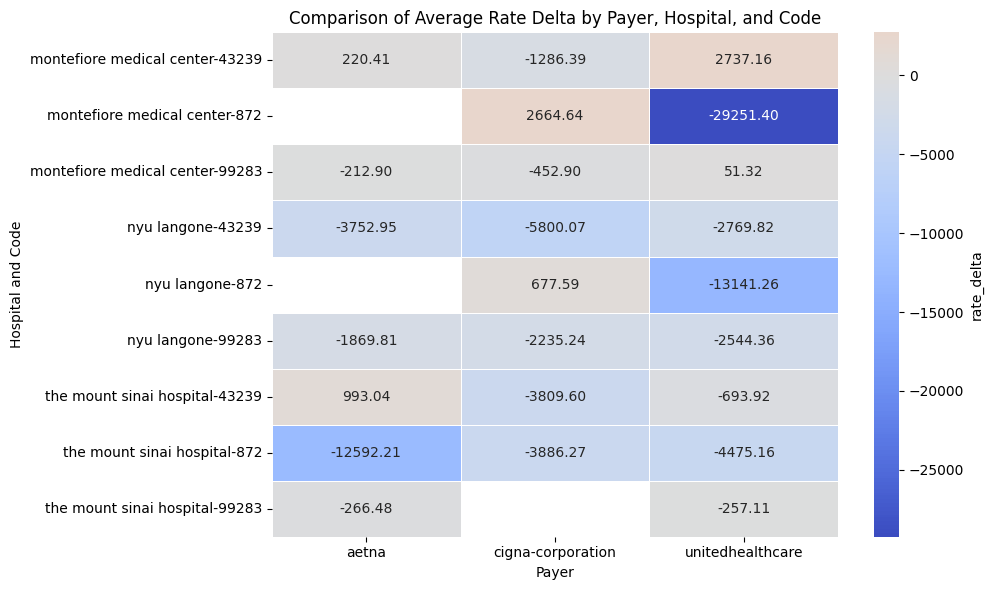

In [32]:
# Aggregate the Rate Delta by Hospital, CPT Code, and Payer (mean in this case)
agg_df = reduced_df.loc[reduced_df['match_indicator'] == "Yes"].groupby(['hospital_name', 'code', 'payer'])['rate_delta'].mean().reset_index()

# Pivot the DataFrame to prepare it for visualization
# Rows: Hospitals, Columns: Payers, Values: Aggregated Rate Delta
agg_df = reduced_df.groupby(['hospital_name', 'code', 'payer'])['rate_delta'].mean().reset_index()
pivot_df = agg_df.pivot_table(index=['hospital_name', 'code'], columns='payer', values='rate_delta', aggfunc='first')

# Set up the visualization
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f', cbar_kws={'label': 'rate_delta'})

# Add labels and title
plt.title('Comparison of Average Rate Delta by Payer, Hospital, and Code')
plt.xlabel('Payer')
plt.ylabel('Hospital and Code')

# Show the plot
plt.tight_layout()
plt.show()
